# Логистический классификатор
Логистическая регрессия (logistic regression) - это методика, применяемая
для объяснения отношений между входными и выходными переменными.
Входные переменные считаются независимыми, выходные - зависимыми .
Зависимая переменная может иметь лишь фиксированный набор значений.
Эги значения соответствуют классам задачи классификации.
Нашей целью является идентификация отношений между независимыми
и зависимыми переменными посредством оценки вероятностей того, что та
или иная зависимая переменная относится к тому или иному классу./

In [2]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt


In [3]:
X = np.array([[3.1, 7.2], [4, 6.7], [2.9, 8], [5.1, 4.5], [6, 5], [5.6, 5], [3.3, 0.4], [3.9, 0.9], [2.8, 1], [0.5, 3.4], [1, 4], [0.6, 4.9]])
y = np.array( [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3])

In [4]:
classifier = linear_model.LogisticRegression(solver='liblinear', C=1)

In [5]:
classifier.fit(X, y)

LogisticRegression(C=1, solver='liblinear')

In [6]:
import numpy as np
import matplotlib.pyplot as plt
def viz_class(classifier, X, y):
    # Определение для Х и У минимального и максимального
    # значений, которые будут использоваться при построении сетки
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

    # Определение величины шага для построения сетки 
    mesh_step_size = 0.1 # очень внимательно с этим коэф
    # ибо влияет на скорость создания изоображения и его размер 
    # что конечно логично)))

    # Определение сетки для значений Х и У
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))

    # Вьmолнение классификатора на сетке данных
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

    # Переформирование выходного массива
    output = output.reshape(x_vals.shape)

    # Создание графика
    plt.figure()

    # выбор цветовой схемы для графика 
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)

    # Размещение тренировочных точек на графике 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # Определение границ графика
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())

    # Определение делений на осях Х и У
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))

    plt.show()

C:\Users\D395~1\AppData\Local\Temp/ipykernel_5952/1625491382.py:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)


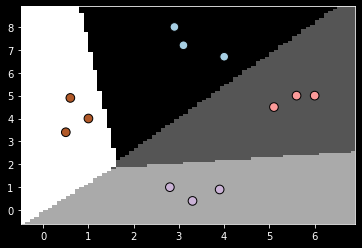

In [7]:
viz_class(classifier, X,y)

In [8]:
classifier = linear_model.LogisticRegression(solver='liblinear', C=100)

In [11]:
classifier.fit(X, y)

LogisticRegression(C=100, solver='liblinear')

C:\Users\D395~1\AppData\Local\Temp/ipykernel_5952/1625491382.py:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)


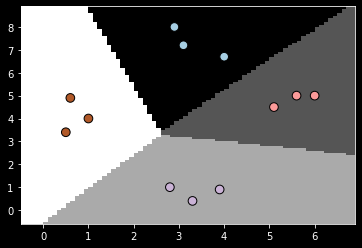

In [12]:
viz_class(classifier, X,y)

Более точное разграничение
Это объясняется тем, что параметр С налагает определенный штраф на
неточности классификации, поэтому алгоритм стремится лучше приспособиться
к тренировочным данным. Значение этого параметра необходимо
очень тщательно подбирать, поскольку его чрезмерное увеличение приведет
к переобучению модели на тренировочных данных, и она не будет хорошо
обобщаться.